In [77]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

sns.set_style('darkgrid')

In [164]:
path_train = 'churn-bigml-80.csv'
path_test = 'churn-bigml-20.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

### 1. THÔNG TIN CƠ BẢN VỀ DỮ LIỆU

----
### Tập dữ liệu về khách hàng trong lĩnh vực telecom. 
##### Yêu cầu: Từ dữ liệu sử dụng các kĩ thuật để có thể xây dựng mô hình dự đoán Khách hàng rời bỏ
### Tập dữ liệu bao gồm: 
    * Tập train: 2666 quan sát
    * Tập test: 667 quan sát
### Hiểu rõ các thuộc tính trong mẫu:
1. State                    : Khu vực khách hàng ở
2. Account length           : Thời gian sử dụng dịch vụ của khách hàng
3. Area code                : Mã khu vực
4. International plan       : Chuyển vùng quốc tế
5. Voice mail plan          : Khách hàng có sử dụng dịch vụ để lại lời nhắn
6. Number vmail messages    : Số voice mail đã thực hiện
7. Total day minutes        : Số phút gọi ban ngày
8. Total day calls          : Số cuộc gọi ban ngày
9. Total day charge         : Tổng số phí ban ngày
10. Total eve minutes       : Tổng số phút gọi buổi tối
11. Total eve calls         : Tổng số cuộc gọi buổi tối
12. Total eve charge        : Tổng số phí buổi tối
13. Total night minutes  	: Tổng số phút ban đêm
14. Total night calls	    : Tổng số cuộc gọi ban đêm
15. Total night charge	    : Tổng phí ban đêm
16. Total intl minutes   	: Tổng số phút gọi quốc tế
17. Total intl calls	    : Tổng số cuộc gọi quốc tế
18. Total intl charge       : Tổng phí ban đêm
19. Customer service calls	: Số cuộc gọi khách hàng đến tổng đài
20. Churn                   : Khách hàng ở lại / rời bỏ
----

In [79]:
df_train.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [80]:
df_train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [81]:
df_test.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

### 2. KHÁM PHÁ  DỮ LIỆU
---

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [83]:
df_train.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [84]:
print('Số lượng missing trong data:\n')
print(df_train.isna().sum())

Số lượng missing trong data:

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [85]:
print(f'Số lượng dữ liệu bị lặp: {df_train.duplicated().sum()}')

Số lượng dữ liệu bị lặp: 0


###### Replace values in column

In [86]:
df_train['Churn'] = df_train['Churn'].map({True:1, False:0})

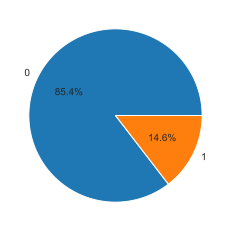

In [87]:
churn_pie = df_train['Churn'].value_counts().reset_index()
plt.pie(churn_pie.Churn, labels=churn_pie.index, autopct='%1.1f%%')
plt.show()

###### -> Tập dữ liệu cho thấy tỉ lệ khách hàng rời bỏ thấp


In [88]:
object_col = [col for col in df_train.columns if df_train[col].dtype == 'O']
print(object_col)

['State', 'International plan', 'Voice mail plan']


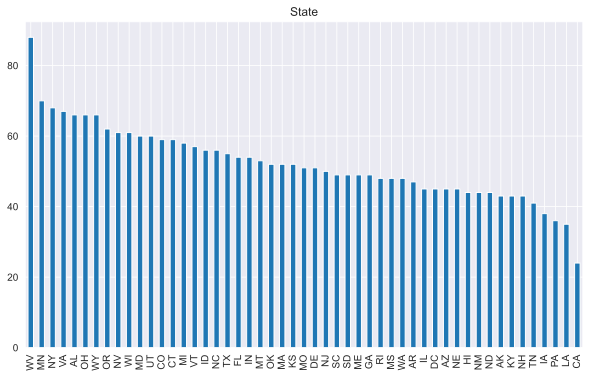

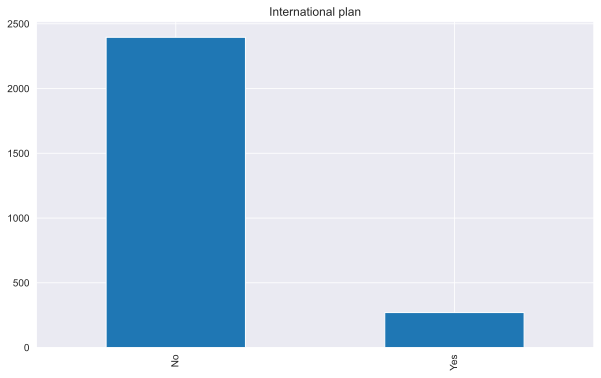

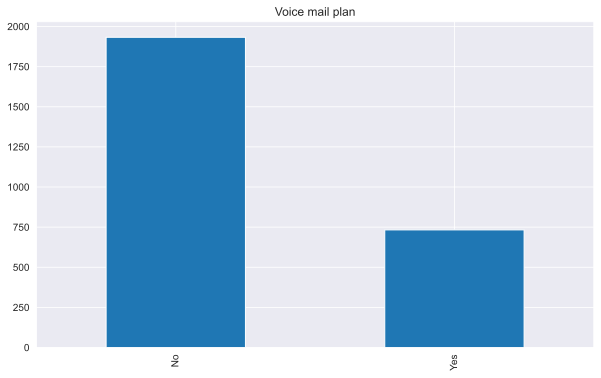

In [89]:
for name in object_col:
    df_train[name].value_counts().plot(kind='bar', figsize=(10,6))
    plt.title(name)
    
    plt.show()

In [90]:
numeric_col = [col for col in df_train.columns if df_train[col].dtype != 'O']
print(numeric_col)

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


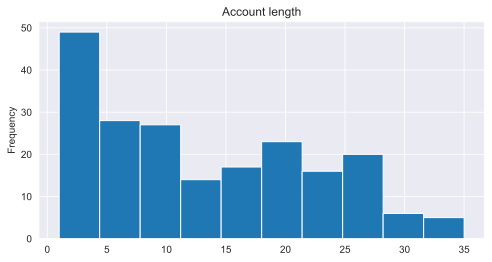

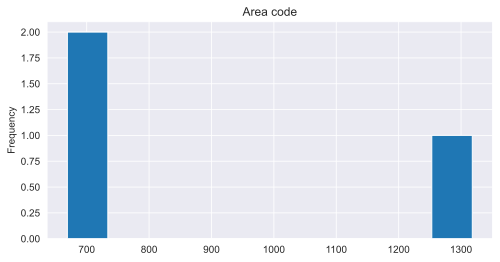

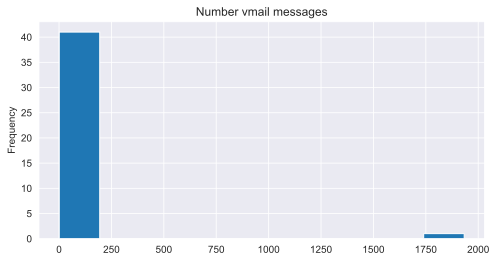

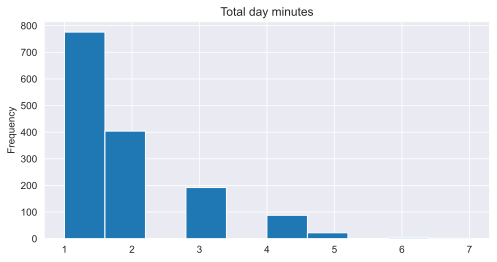

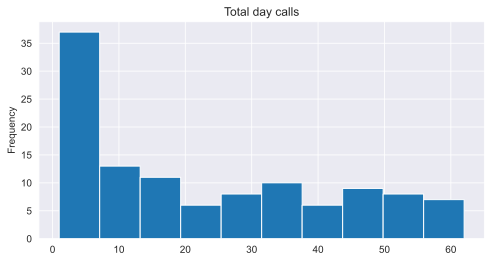

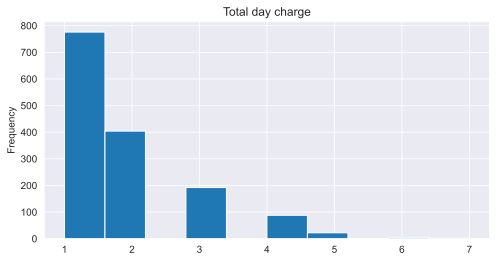

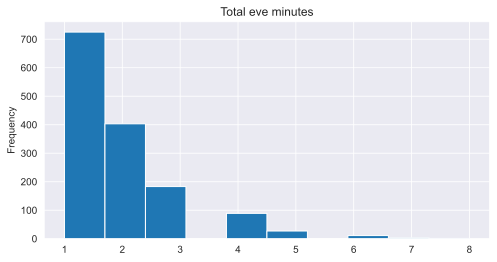

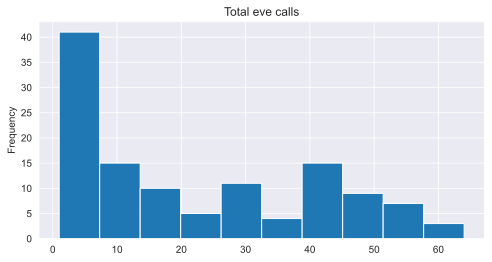

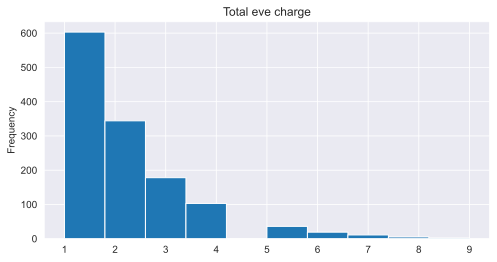

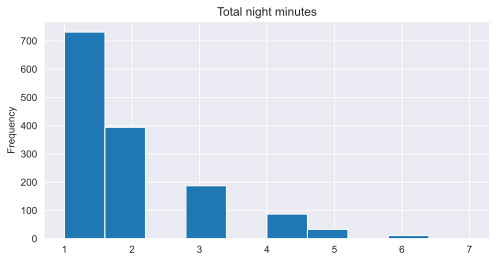

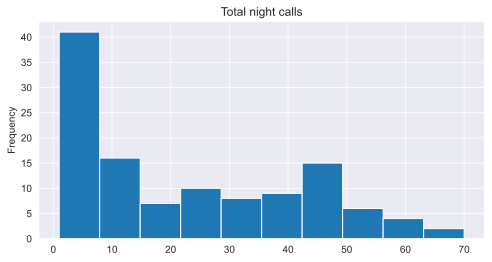

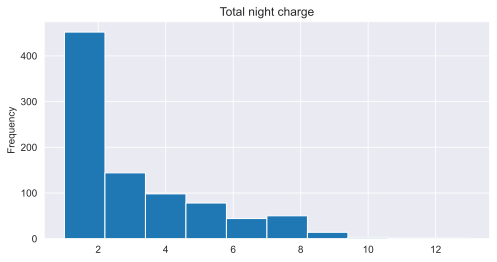

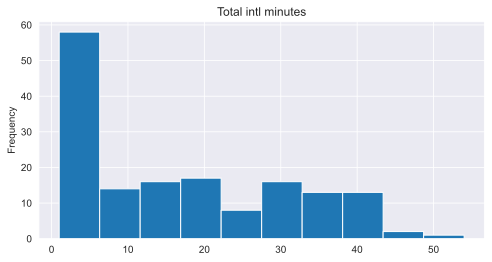

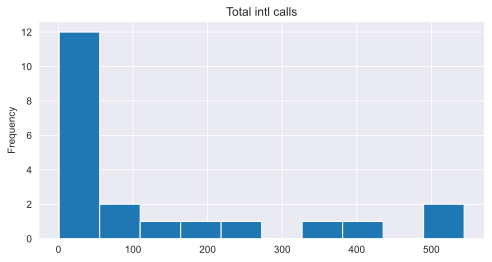

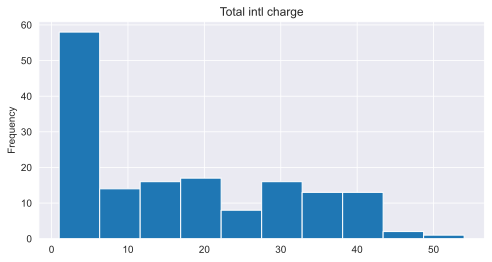

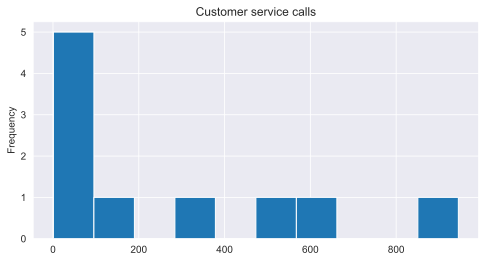

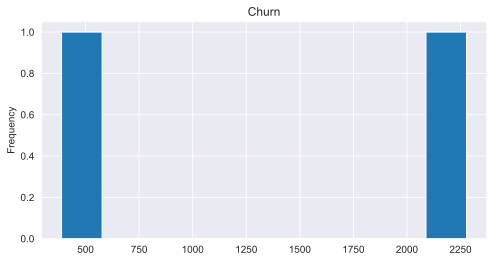

In [91]:
for name in numeric_col:
    df_train[name].value_counts().plot(kind='hist', figsize=(8,4))
    plt.title(name)
    plt.show()

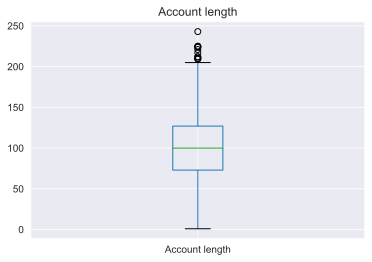

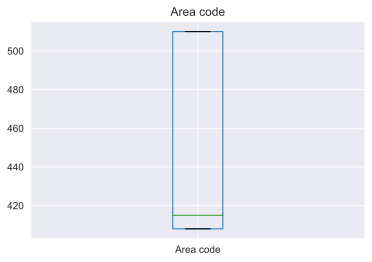

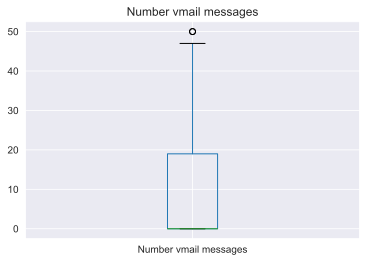

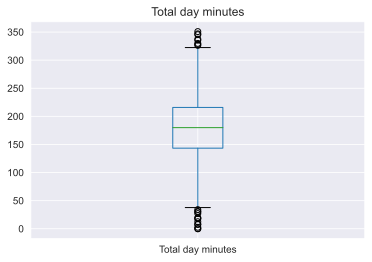

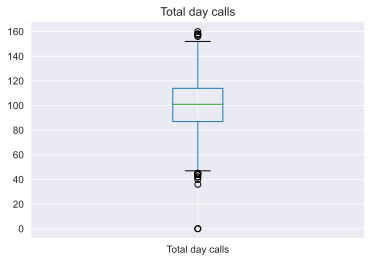

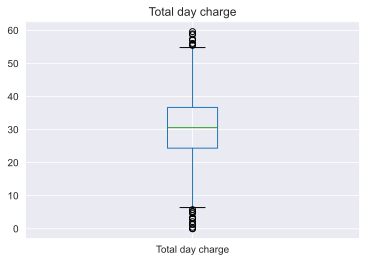

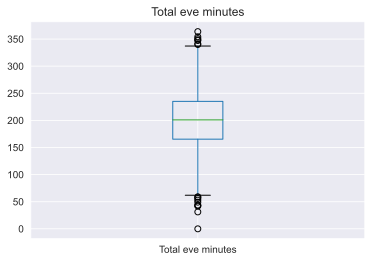

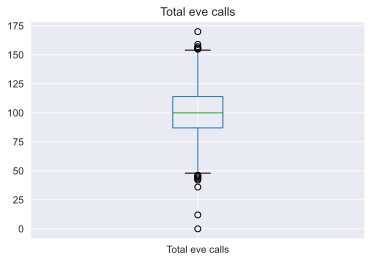

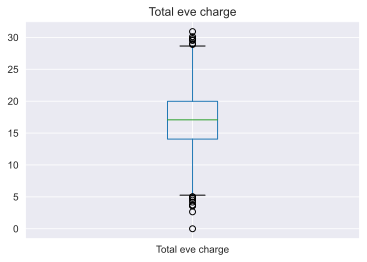

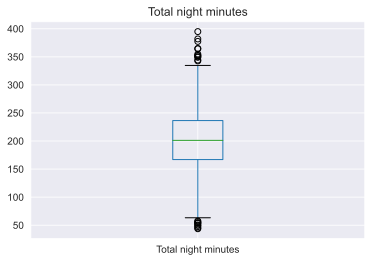

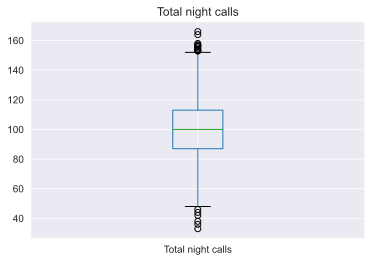

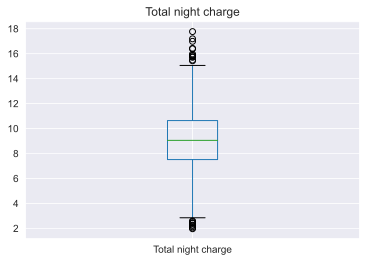

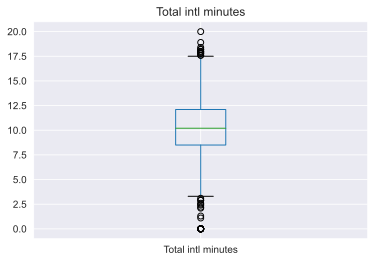

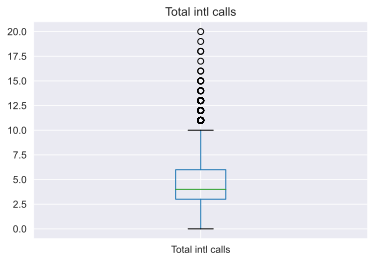

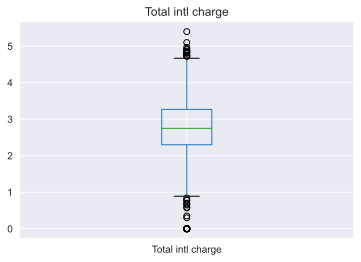

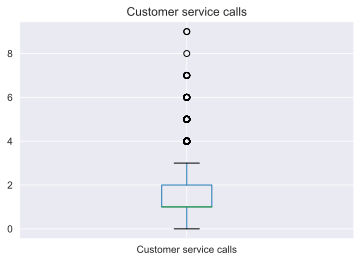

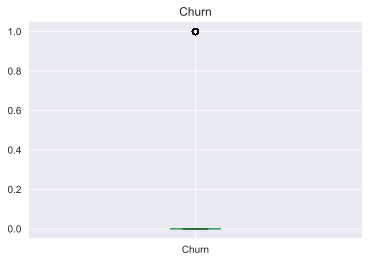

In [92]:
for name in numeric_col:
    df_train.boxplot(column = name)
    plt.title(name)
    plt.show()

In [93]:
display(pd.crosstab(df_train['Churn'], df_train['Voice mail plan'], normalize=True))
display(pd.crosstab(df_train['Churn'], df_train['International plan'], normalize=True))

Voice mail plan        No       Yes
Churn                              
0                0.603901  0.250563
1                0.121155  0.024381

International plan        No       Yes
Churn                                 
0                   0.797449  0.057014
1                   0.101275  0.044261

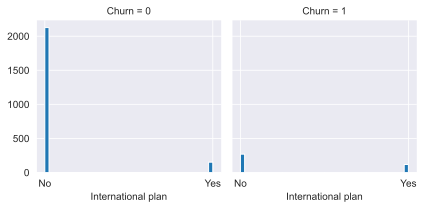

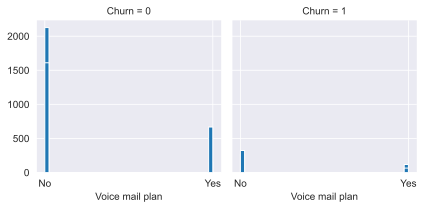

In [94]:
g = sns.FacetGrid(df_train, col='Churn')
for i in ['International plan', 'Voice mail plan']:
    g.map(plt.hist, i, bins=40)
    plt.show();

###### -> Khách hàng không sử dụng dịch vụ chuyển vùng và dịch vụ voice mail  thường có tỉ lệ rời bỏ thấp hơn

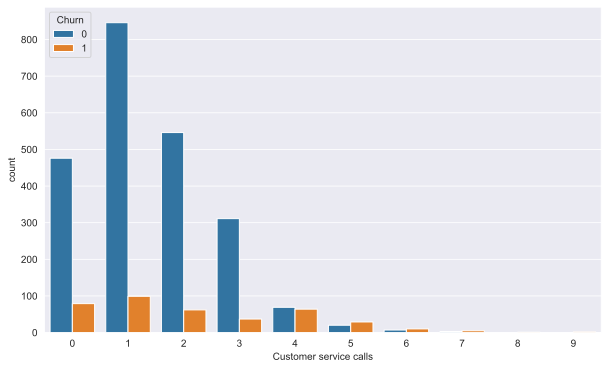

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Customer service calls', hue='Churn', data=df_train)
plt.show();

###### -> Có vẻ như tỉ lệ rời bỏ của khách hàng sẽ tăng khi số cuộc gọi đến bộ phận chăm sóc khách hàng > 4

In [96]:
df_train.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].agg(['max', 'min', 'mean', 'std'])

Total day minutes                             Total eve minutes        \
                    max  min        mean        std               max   min   
Churn                                                                         
0                 313.8  0.0  175.104346  50.105334             354.2   0.0   
1                 350.8  0.0  205.181186  68.490213             363.7  70.9   

                             Total night minutes                               
             mean        std                 max   min        mean        std  
Churn                                                                          
0      198.853380  50.818954               395.0  43.7  200.464091  51.284496  
1      209.385309  50.863718               354.9  47.4  205.307216  47.565157

In [97]:
pd.pivot_table(df_train, values=['Total day minutes', 'Total eve minutes', 'Total night minutes'],
      index='Area code',  aggfunc='mean')

Total day minutes  Total eve minutes  Total night minutes
Area code                                                           
408               177.610762         201.090284           199.803587
415               181.636191         199.971093           202.067147
510               177.142710         200.498085           200.770692

###### Add some new column into dataframe

In [98]:
df_train['total_call'] = df_train['Total day calls'] + df_train['Total eve calls'] + df_train['Total night calls'] + df_train['Total intl calls']
df_train['total_charge'] = df_train['Total day charge'] + df_train['Total eve charge'] + df_train['Total night charge'] + df_train['Total intl charge']

df_train.sample(5)

State  Account length  Area code International plan Voice mail plan  \
2046    SC              19        510                 No              No   
1935    CO             128        510                 No              No   
2384    MI             148        415                Yes              No   
1823    AK             126        415                 No             Yes   
2492    DE             115        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
2046                      0              259.4              116   
1935                      0              199.3               86   
2384                      0              233.5               81   
1823                     31              278.0               88   
2492                      0              195.9              111   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
2046             44.10              269.7              109             22.92   
1935             33.88              194.8              102             16.56   
2384             39.70              187.7               71             15.95   
1823             47.26              253.2               65             21.52   
2492             33.30              227.0              108             19.30   

      Total night minutes  Total night calls  Total night charge  \
2046                175.3                130                7.89   
1935                298.2                 82               13.42   
2384                122.3                 97                5.50   
1823                223.2                114               10.04   
2492                313.2                113               14.09   

      Total intl minutes  Total intl calls  Total intl charge  \
2046                 9.5                 3               2.57   
1935                14.3                 2               3.86   
2384                 9.6                 2               2.59   
1823                 8.7                 4               2.35   
2492                13.2                 1               3.56   

      Customer service calls  Churn  total_call  total_charge  
2046                       1      1         358         77.48  
1935                       4      0         272         67.72  
2384                       0      1         251         63.74  
1823                       0      0         271         81.17  
2492                       2      0         333         70.25

In [99]:
pd.pivot_table(df_train, 'Churn', 'State', aggfunc='mean').sort_values(by='Churn', ascending=False).T

State        TX    NJ        AR        MD        MS       SC       ME  \
Churn  0.290909  0.28  0.234043  0.233333  0.229167  0.22449  0.22449   

State        MI        PA        NV        NH        WA        CA        KS  \
Churn  0.224138  0.222222  0.213115  0.209302  0.208333  0.208333  0.192308   

State        MT        CT        MN        NY        GA        NC        DE  \
Churn  0.188679  0.186441  0.185714  0.176471  0.163265  0.160714  0.156863   

State        MA        OH        KY        OK  ...       FL        SD  \
Churn  0.153846  0.151515  0.139535  0.134615  ...  0.12963  0.122449   

State        TN        WY        CO        OR        IN        DC        AL  \
Churn  0.121951  0.121212  0.118644  0.112903  0.111111  0.111111  0.106061   

State        VT        MO        ND        NM        ID        NE        IL  \
Churn  0.105263  0.098039  0.090909  0.090909  0.089286  0.088889  0.088889   

State        LA        WV        IA        AK        AZ        WI      RI  \
Churn  0.085714  0.079545  0.078947  0.069767  0.066667  0.065574  0.0625   

State        VA        HI  
Churn  0.059701  0.045455  

[1 rows x 51 columns]

###### -> Khu vực TX, NJ là những nơi có tỷ lệ khách hàng rời bỏ cao nhất

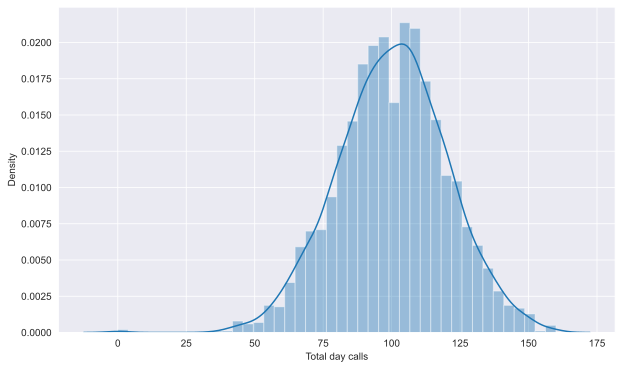

In [100]:
plt.figure(figsize=(10,6))
sns.distplot(df_train['Total day calls'])
plt.show()

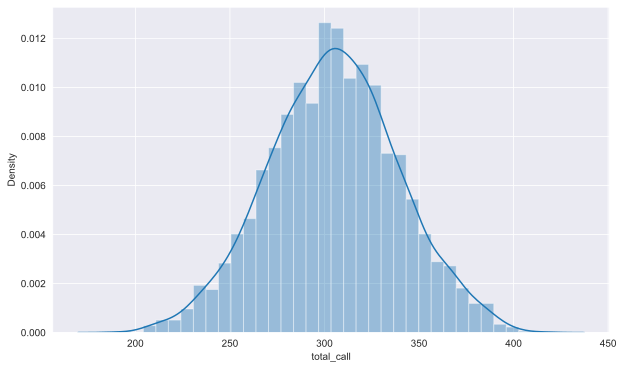

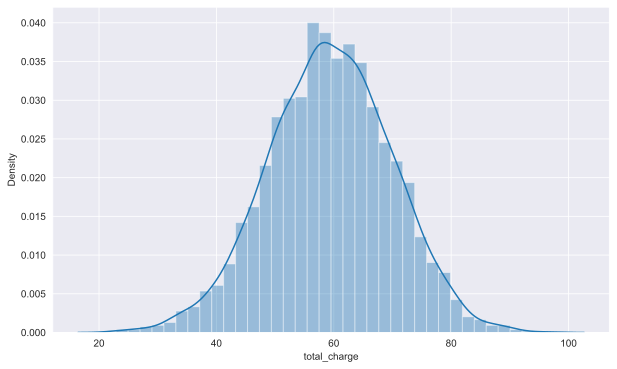

In [101]:
for i in ['total_call', 'total_charge']:
    plt.figure(figsize=(10,6))
    sns.distplot(df_train[i])
    plt.show()

In [102]:
numerical = list(set(numeric_col) - set(['Account length', 'Area code', 'Churn']))
numerical

['Total night minutes',
 'Total eve minutes',
 'Total day minutes',
 'Total night calls',
 'Total day calls',
 'Total intl calls',
 'Total intl charge',
 'Total night charge',
 'Total eve calls',
 'Total intl minutes',
 'Number vmail messages',
 'Total eve charge',
 'Total day charge',
 'Customer service calls']

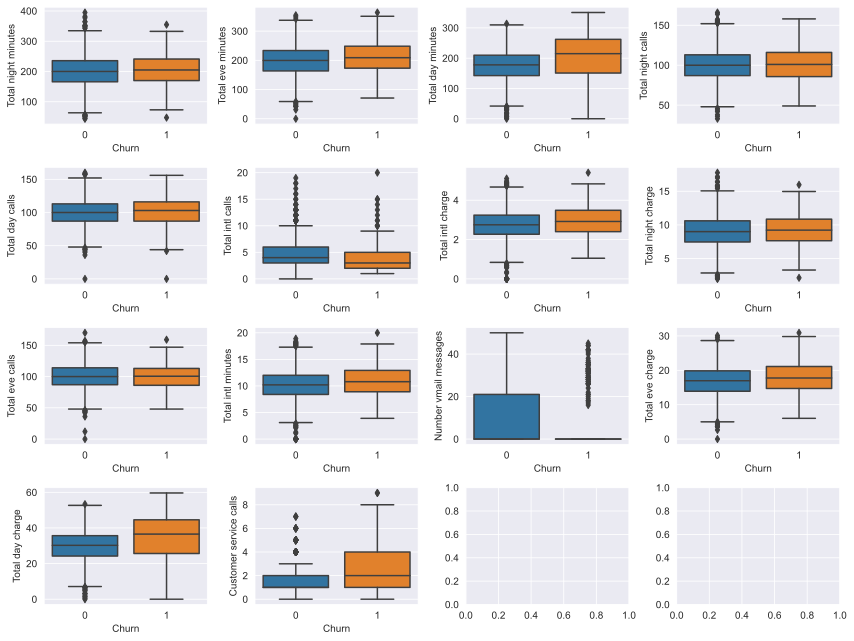

In [103]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,9))

for idx, value in enumerate(numerical):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x='Churn', y=value, data=df_train, ax=ax)
plt.tight_layout();

### Correlation Matrix

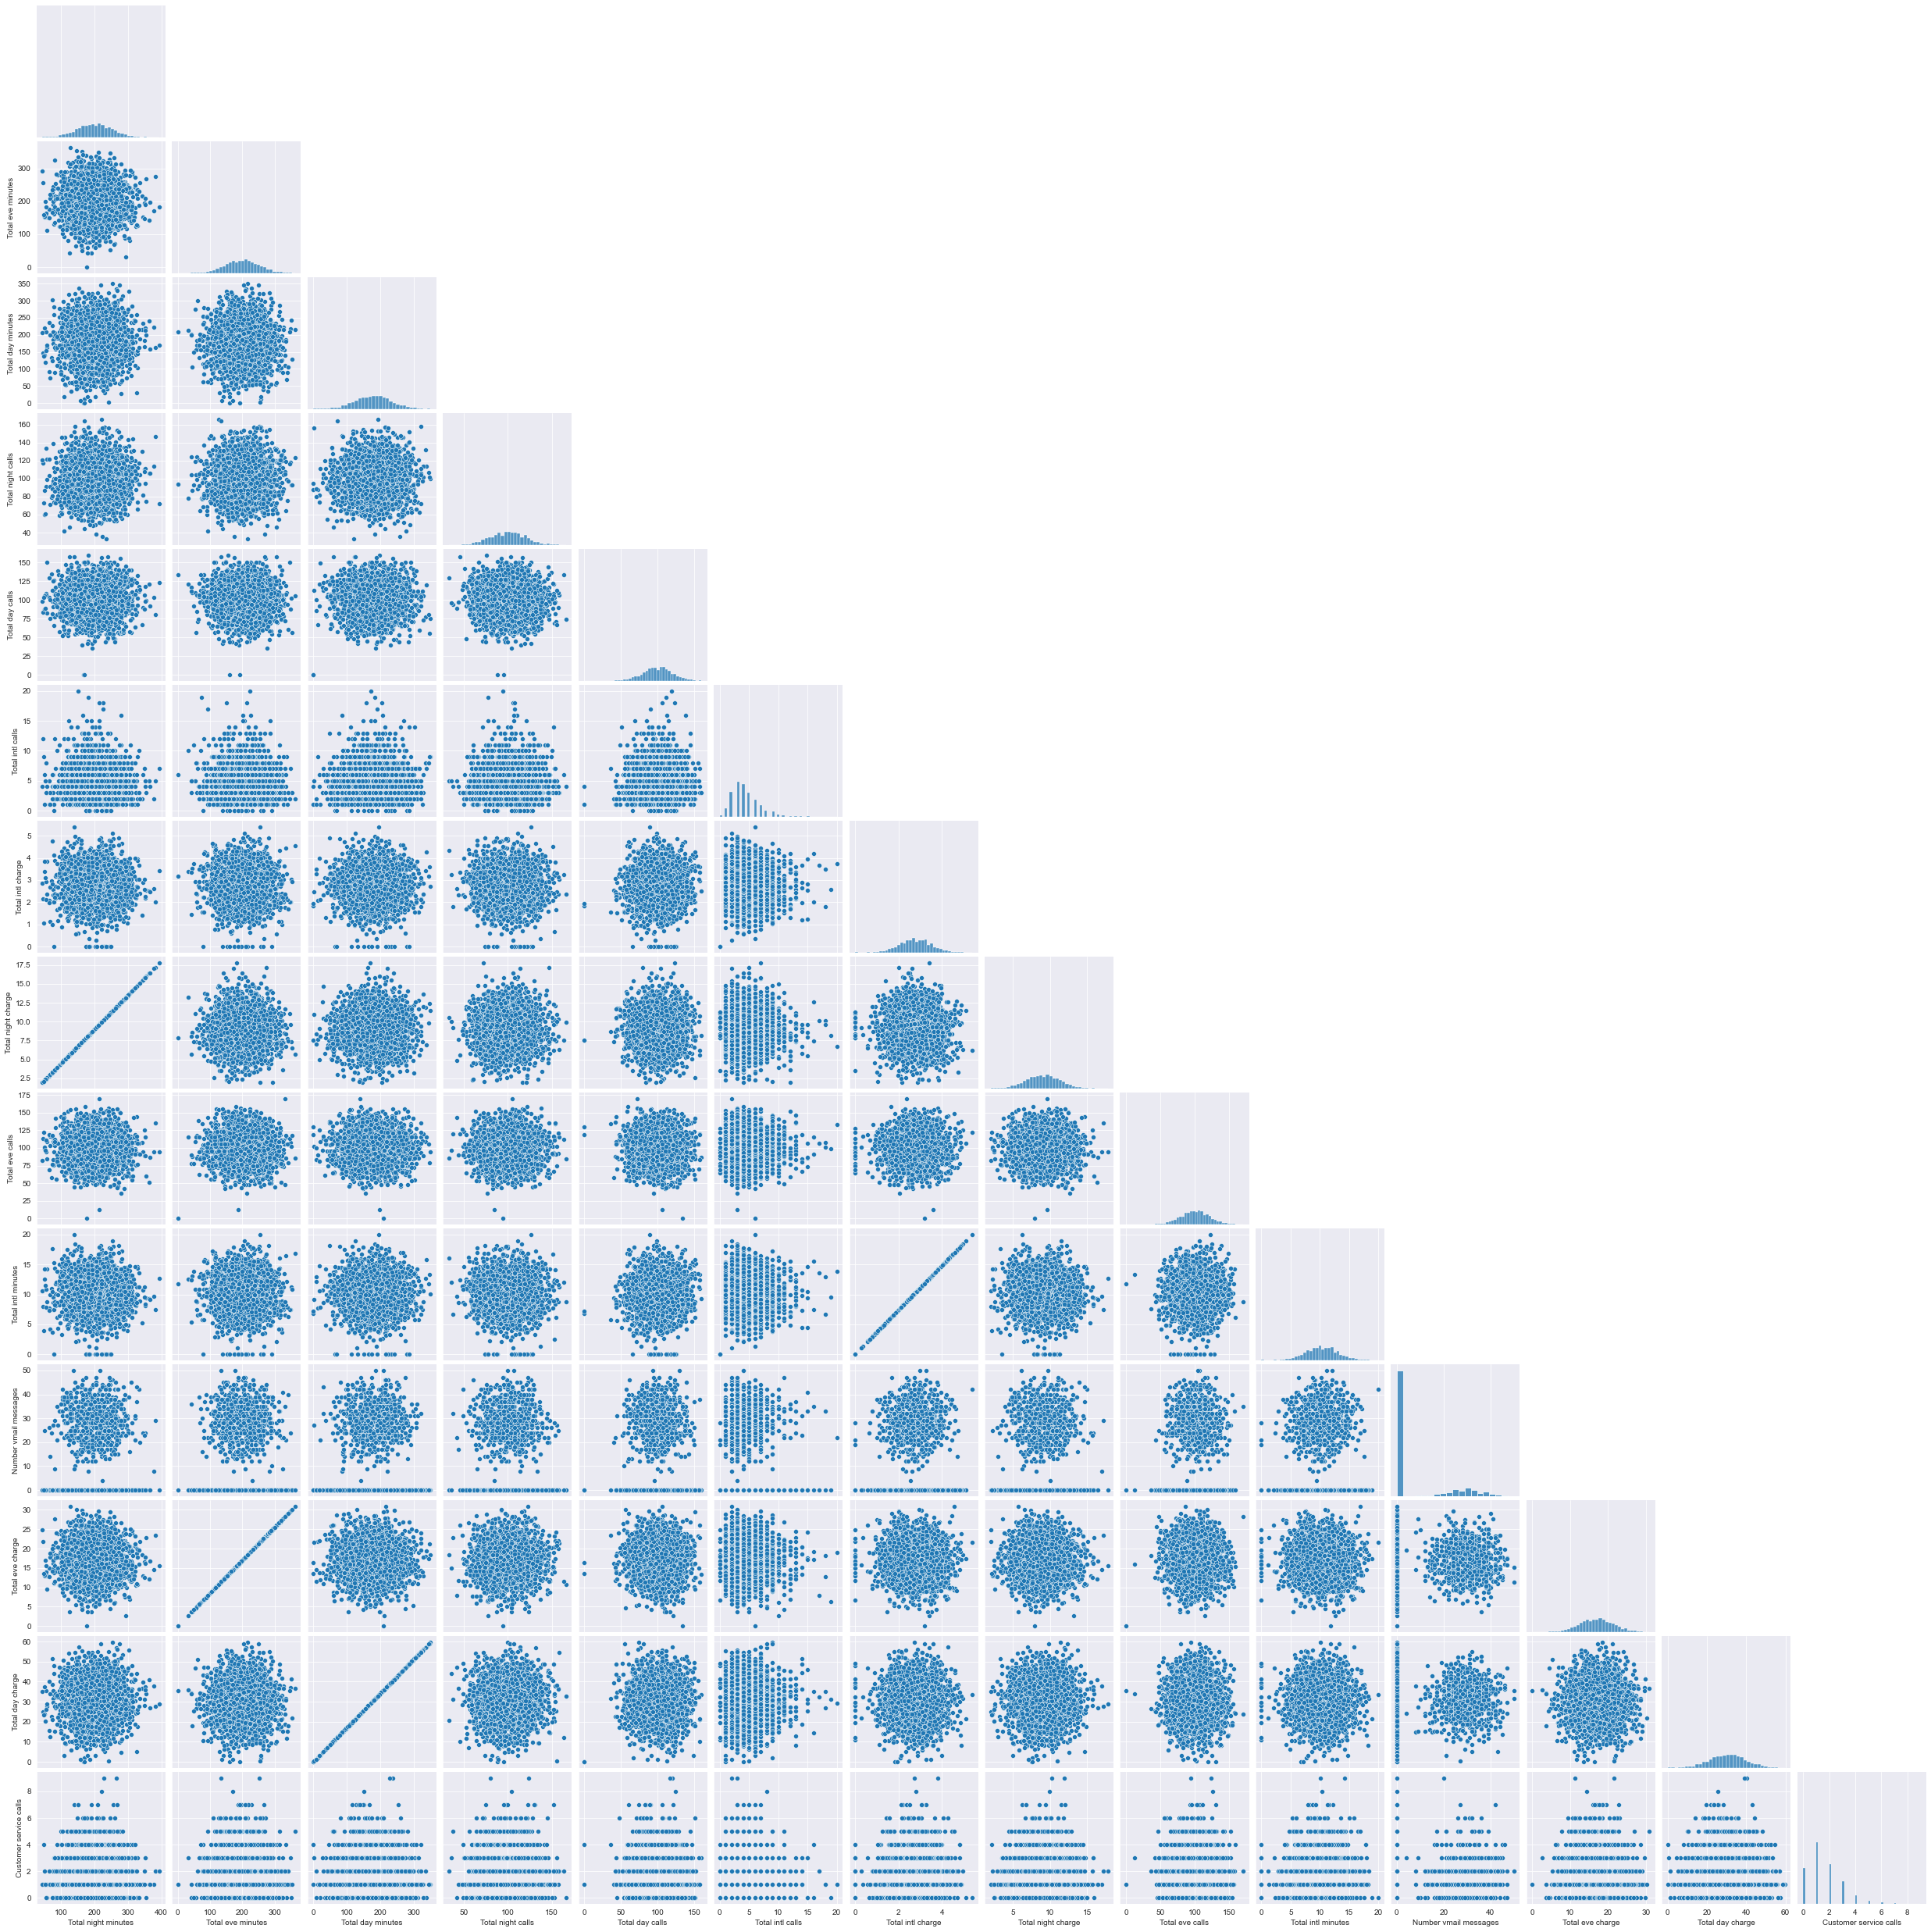

In [104]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_train[numerical], diag_kind='hist', corner=True);

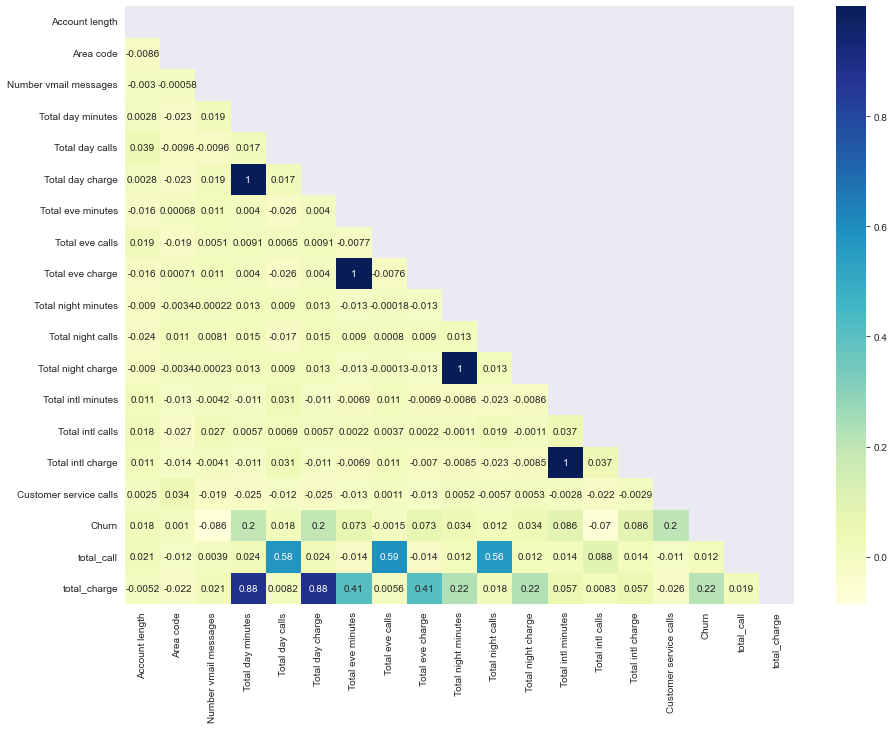

In [105]:
corr_matrix = df_train.corr()
matrix = np.triu(corr_matrix)

plt.figure(figsize=(15,11))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, mask=matrix)
plt.show()

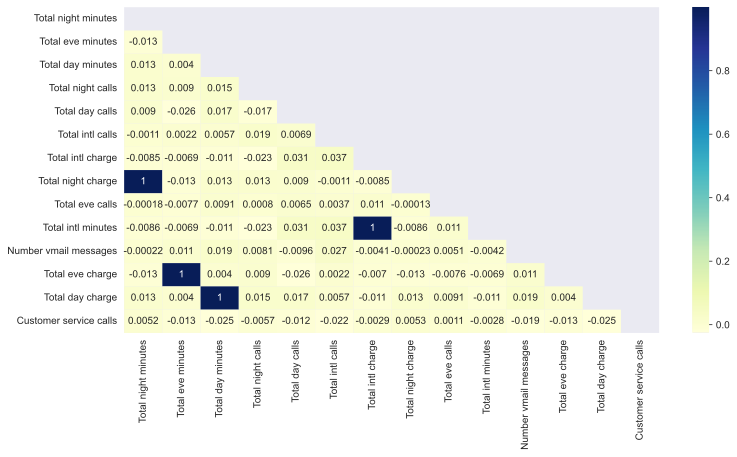

In [106]:
%config InlineBackend.figure_format = 'svg'
corr_matrix = df_train[numerical].corr()
matrix = np.triu(corr_matrix)

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, mask=matrix)
plt.show()

### 3. XÂY DỰNG MÔ HÌNH HỌC MÁY GIẢI QUYẾT BÀI TOÁN
---
Đây là lớp bài toán thuộc mô hình học có giám sát. Các mô hình cơ bản để giải quyết vấn đề này là:
* Logistic Regression
* Decision Tree
* Random Forest
* KNN - k-Nearest Neighbors
* SVM - Support Vector Machine
* ANN - Artificial Neutral Network


#### 1) Chuẩn bị dữ liệu

In [107]:
# df_train['International plan'] = df_train['International plan'].map({'No':0, 'Yes':1})
# df_train['Voice mail plan'] = df_train['Voice mail plan'].map({'No':0, 'Yes':1})
df_train.drop(columns=['State', 'total_call', 'total_charge'], inplace=True)

In [108]:
X = df_train.drop('Churn', axis=1)
Y = df_train['Churn']

# X_test = df_test.drop('Churn', axis=1)
# Y_test = df_test['Churn']

In [109]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [110]:
X.shape

(2666, 18)

In [111]:
names = ['X_train', 'x_test', 'Y_train', 'y_test']
for i,j in enumerate([X_train, x_test, Y_train, y_test]):
    print(f'Shape of {names[i]} is {j.shape}')

Shape of X_train is (2132, 18)
Shape of x_test is (534, 18)
Shape of Y_train is (2132,)
Shape of y_test is (534,)


In [112]:
X_train.head()

Account length  Area code International plan Voice mail plan  \
1912             100        415                 No              No   
745              130        415                 No              No   
145               70        408                 No              No   
1569              60        510                 No              No   
971               91        510                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
1912                      0              191.9               95   
745                       0              120.5              127   
145                       0              232.1              122   
1569                      0              221.1              106   
971                       0              159.0              109   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
1912             32.62              200.9              101             17.08   
745              20.49              189.7               52             16.12   
145              39.46              292.3              112             24.85   
1569             37.59              178.6               48             15.18   
971              27.03              255.1              142             21.68   

      Total night minutes  Total night calls  Total night charge  \
1912                271.9                 74               12.24   
745                 270.1                107               12.15   
145                 201.2                112                9.05   
1569                202.7                 90                9.12   
971                  82.4                 73                3.71   

      Total intl minutes  Total intl calls  Total intl charge  \
1912                18.2                 3               4.91   
745                 14.3                 2               3.86   
145                  0.0                 0               0.00   
1569                 7.4                 3               2.00   
971                 10.1                 4               2.73   

      Customer service calls  
1912                       1  
745                        1  
145                        3  
1569                       1  
971                        0

In [129]:
X_train['Customer service calls'].unique()

array([1, 3, 0, 4, 2, 5, 6, 7, 8, 9], dtype=int64)

In [124]:
from sklearn.preprocessing import LabelEncoder
ecd = LabelEncoder()

columns_to_encode = ['International plan', 'Voice mail plan']  

# Lặp qua từng cột và thực hiện mã hóa
for column in columns_to_encode:
    X_train[column] = ecd.fit_transform(X_train[column])

# Lặp qua từng cột và thực hiện mã hóa tương ứng cho X_test
for column in columns_to_encode:
    x_test[column] = ecd.transform(x_test[column])

In [126]:
df_encoded_train = pd.get_dummies(X_train, columns=['Area code'])
df_encoded_test = pd.get_dummies(x_test, columns=['Area code'])

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_train = scaler.fit_transform(df_encoded_train)
normalized_test = scaler.fit_transform(df_encoded_test)

#### 2) Xây dựng mô hình

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 

models = [
    LogisticRegression(), 
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier()
]

# Huấn luyện và dự đoán cho từng mô hình
for model in models:
    model.fit(normalized_train, Y_train)
    y_pred = model.predict(normalized_test)
    
    # Đánh giá hiệu suất của mô hình
    metrics = {
    'accuracy_score': accuracy_score,
    'f1_score': f1_score,
    'precision_score': precision_score,
    'recall_score': recall_score
    }

    print(f'SCORE OF {model}\n')
    for metric_name, metric_func in metrics.items():
        print(f'{metric_name} is: {metric_func(y_test, y_pred)}')
    print('----------------------------------------')

SCORE OF LogisticRegression()

accuracy_score is: 0.8576779026217228
f1_score is: 0.2692307692307692
precision_score is: 0.4
recall_score is: 0.2028985507246377
----------------------------------------
SCORE OF DecisionTreeClassifier()

accuracy_score is: 0.8127340823970037
f1_score is: 0.489795918367347
precision_score is: 0.3779527559055118
recall_score is: 0.6956521739130435
----------------------------------------
SCORE OF RandomForestClassifier()

accuracy_score is: 0.900749063670412
f1_score is: 0.6442953020134228
precision_score is: 0.6
recall_score is: 0.6956521739130435
----------------------------------------
SCORE OF KNeighborsClassifier()

accuracy_score is: 0.8745318352059925
f1_score is: 0.34951456310679613
precision_score is: 0.5294117647058824
recall_score is: 0.2608695652173913
----------------------------------------
SCORE OF SVC()

accuracy_score is: 0.8838951310861424
f1_score is: 0.32608695652173914
precision_score is: 0.6521739130434783
recall_score is: 0.21739130

In [179]:
model_use = RandomForestClassifier()
model_use.fit(normalized_train, Y_train)

RandomForestClassifier()

#### -> Ta có thể nhận thấy mô hình Random Forest có điểm số tốt nhất, nên ta sẽ sử dụng mô hình này trong dự đoán khách hàng rời bỏ

In [166]:
df_test['Churn'] = df_test['Churn'].map({False:0, True:1})
df_test.drop(columns=['State'], inplace=True)

In [187]:
df_test_train = df_test.iloc[:,:18]
df_test_test = df_test.iloc[:, 18:]

In [174]:
columns_to_encode1 = ['International plan', 'Voice mail plan']  

# Lặp qua từng cột và thực hiện mã hóa
for column1 in columns_to_encode1:
    df_test_train[column1] = ecd.fit_transform(df_test_train[column1])

# Lặp qua từng cột và thực hiện mã hóa tương ứng cho X_test
for column in columns_to_encode:
    df_test_train[column1] = ecd.transform(df_test_train[column1])

In [176]:
df_test_train_ecd = pd.get_dummies(df_test_train, columns=['Area code'])

In [177]:
scaler_df_test_train_ecd = scaler.fit_transform(df_test_train_ecd)

In [181]:
y_predict = model_use.predict(scaler_df_test_train_ecd)

In [184]:
metrics = {
    'accuracy_score': accuracy_score,
    'f1_score': f1_score,
    'precision_score': precision_score,
    'recall_score': recall_score
    }

for metric_name, metric_func in metrics.items():
    print(f'{metric_name} is: {metric_func(df_test_test, y_predict)}')

accuracy_score is: 0.9460269865067467
f1_score is: 0.788235294117647
precision_score is: 0.8933333333333333
recall_score is: 0.7052631578947368


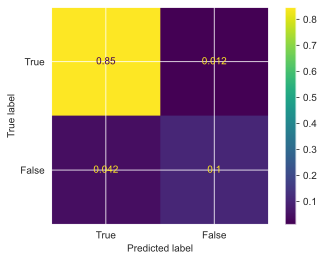

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lg= confusion_matrix(df_test_test, y_predict, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix = lg, display_labels=['True', 'False'])
disp.plot()
plt.show()